In [1]:
import pandas as pd
from pathlib import Path
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

## To-Do

1. Impute SOG%
2. Standardize/ normalize data
3. Visualization
4. Distance calculation

In [2]:
path = Path.home() / 'Downloads' / 'mls'
p = path.glob('**/*')
files = [x for x in p if x.is_file()]
file_path = path / 'all_players.csv'
df_players = pd.read_csv(file_path)

In [3]:
df_players["Season"].unique()

array(['reg', 'post'], dtype=object)

In [4]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15767 entries, 0 to 15766
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   15767 non-null  object 
 1   Club     10274 non-null  object 
 2   POS      15767 non-null  object 
 3   GP       15767 non-null  int64  
 4   GS       15767 non-null  int64  
 5   MINS     15767 non-null  int64  
 6   G        15767 non-null  int64  
 7   A        15767 non-null  int64  
 8   SHTS     15767 non-null  int64  
 9   SOG      15767 non-null  int64  
 10  GWG      15767 non-null  int64  
 11  PKG/A    15767 non-null  object 
 12  HmG      15767 non-null  int64  
 13  RdG      15767 non-null  int64  
 14  G/90min  15767 non-null  float64
 15  SC%      15767 non-null  float64
 16  GWA      15767 non-null  int64  
 17  HmA      15767 non-null  int64  
 18  RdA      15767 non-null  int64  
 19  A/90min  15767 non-null  float64
 20  FC       15767 non-null  int64  
 21  FS       157

In [5]:
df_players = df_players.query('Season == "reg" & Year == 2019')

In [6]:
df_players.Player.nunique()

625

In [7]:
df_players.shape

(625, 28)

So every player has 1 row

In [8]:
features_remove = ['Club', 'POS', 'PKG/A', 'Year', 'Season', 'SOG%']

In [9]:
features = [item for item in df_players.columns.tolist() if item not in features_remove]

In [10]:
features

['Player',
 'GP',
 'GS',
 'MINS',
 'G',
 'A',
 'SHTS',
 'SOG',
 'GWG',
 'HmG',
 'RdG',
 'G/90min',
 'SC%',
 'GWA',
 'HmA',
 'RdA',
 'A/90min',
 'FC',
 'FS',
 'OFF',
 'YC',
 'RC']

In [11]:
df_players = df_players[features]

In [12]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 8958 to 9582
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   625 non-null    object 
 1   GP       625 non-null    int64  
 2   GS       625 non-null    int64  
 3   MINS     625 non-null    int64  
 4   G        625 non-null    int64  
 5   A        625 non-null    int64  
 6   SHTS     625 non-null    int64  
 7   SOG      625 non-null    int64  
 8   GWG      625 non-null    int64  
 9   HmG      625 non-null    int64  
 10  RdG      625 non-null    int64  
 11  G/90min  625 non-null    float64
 12  SC%      625 non-null    float64
 13  GWA      625 non-null    int64  
 14  HmA      625 non-null    int64  
 15  RdA      625 non-null    int64  
 16  A/90min  625 non-null    float64
 17  FC       625 non-null    int64  
 18  FS       625 non-null    int64  
 19  OFF      625 non-null    int64  
 20  YC       625 non-null    int64  
 21  RC       625

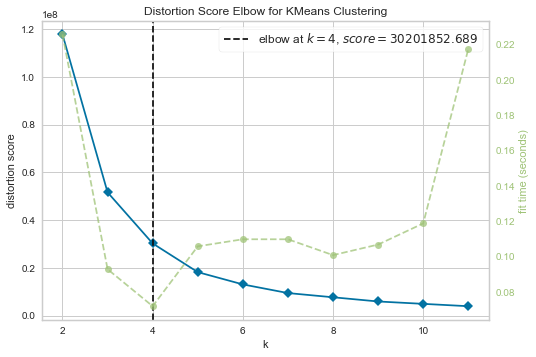

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
X = df_players.iloc[:, 1:].values

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

So 4 is the best number of clusters. We'll build a clustering model using $n=4$.

In [26]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
df_players['player_type'] = kmeans.labels_

# kmeans.cluster_centers_

In [32]:
df_players.query('player_type == 1').sample(10)

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,HmG,...,GWA,HmA,RdA,A/90min,FC,FS,OFF,YC,RC,player_type
8995,Diego Valeri,31,29,2600,8,16,83,32,2,5,...,7,8,8,0.55,26,32,13,4,0,1
9128,Kellyn Acosta,31,30,2619,2,2,35,12,0,2,...,0,1,1,0.07,47,20,0,9,1,1
9033,Michael Barrios,32,31,2731,5,15,56,18,1,5,...,3,8,7,0.49,53,36,10,6,0,1
8983,Carles Gil,34,34,3052,10,14,67,24,1,3,...,4,6,8,0.41,15,87,3,6,0,1
9155,Anton Tinnerholm,30,30,2632,1,8,32,12,0,1,...,2,4,4,0.27,22,28,7,4,0,1
8959,Zlatan Ibrahimovic,29,29,2610,30,7,151,65,9,22,...,3,2,5,0.24,51,28,44,7,0,1
8978,Pedro Santos,33,30,2763,11,6,75,21,2,8,...,4,3,3,0.20,33,81,6,7,0,1
9581,Miles Robinson,34,33,2978,0,0,19,6,0,0,...,0,0,0,0.00,23,26,0,4,0,1
9576,Artur,30,28,2452,0,0,15,3,0,0,...,0,0,0,0.00,48,17,2,4,0,1
9161,Leonardo Jara,30,25,2291,1,5,34,4,0,1,...,0,4,1,0.20,27,30,0,5,0,1


In [34]:
df_players.query('Player == "Alejandro Pozuelo"')

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,HmG,...,GWA,HmA,RdA,A/90min,FC,FS,OFF,YC,RC,player_type
8969,Alejandro Pozuelo,30,28,2524,12,12,76,31,4,10,...,2,6,6,0.43,32,54,5,4,1,1


In [35]:
df_players.query('Player == "Jonathan Osorio"')

,Player,GP,GS,MINS,G,A,SHTS,SOG,GWG,HmG,...,GWA,HmA,RdA,A/90min,FC,FS,OFF,YC,RC,player_type
9040,Jonathan Osorio,24,18,1756,5,4,27,14,2,3,...,1,3,1,0.21,11,21,2,2,0,2
